# Data visualization of walmart stores data

In [1]:

# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os

# 1.5 for working in ipython
#%matplotlib qt5
#%matplotlib inline

from scipy.stats import scoreatpercentile, pearsonr

In [2]:
# Mount gdrive
#from google.colab import drive
#drive.mount('/gdrive')
#path = "/kaggle/input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv"
#os.chdir(path)
wmart = pd.read_csv("/kaggle/input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv",
                    parse_dates = ['Date'] 
                )

In [3]:
def mapQuarters(num):
    """This function returns the absolute
    value of the entered number"""

    if num >= 1 and num <=3:
        return 1
    if num >= 4 and num <=6:
        return 2
    if num >= 7 and num <=9:
        return 3
    if num >= 10 and num <=12:
        return 4

In [4]:
def mapMonths(x):
    """This function returns the absolute
    value of the entered number"""

    if x == 1:
        return 'Jan'
    if x == 2:
        return 'Feb'
    if x == 3:
        return 'Mar'
    if x == 4:
        return 'Apr'
    if x == 5:
        return 'May'
    if x == 6:
        return 'Jun'
    if x == 7:
        return 'Jul'
    if x == 8:
        return 'Aug'
    if x == 9:
        return 'Sep'
    if x == 10:
        return 'Oct'
    if x == 11:
        return 'Nov'
    if x == 12:
        return 'Dec'

In [5]:
def mapWeekday(x):
    """This function returns the absolute
    value of the entered number"""

    if x == 0:
        return 'Mon'
    if x == 1:
        return 'Tue'
    if x == 2:
        return 'Wed'
    if x == 3:
        return 'Thu'
    if x == 4:
        return 'Fri'
    if x == 5:
        return 'Sat'
    if x == 6:
        return 'Sun'


In [6]:
wmart['Day'] = wmart['Date'].dt.dayofweek #0 for monday through 6 for sunday
wmart['month'] = wmart['Date'].dt.month
wmart['quarter']=wmart['month'].apply(lambda x : mapQuarters(x))
wmart['month']=wmart['month'].apply(lambda x : mapMonths(x))
wmart['Day']=wmart['Day'].apply(lambda x : mapWeekday(x))

wmart['Weather'] = pd.qcut(wmart['Temperature'],3, labels=["Winter", "Spring", "Summer"])
wmart['FuelPrice'] = pd.qcut(wmart['Fuel_Price'],3, labels=["Low", "Nominal", "High"])
wmart['Inflation'] = pd.qcut(wmart['CPI'],3, labels=["Low", "Nominal", "High"])
wmart['Unemployment'] = pd.qcut(wmart['Unemployment'],3, labels=["Low", "Nominal", "High"])

In [7]:
wmart.drop(['Date'], axis=1, inplace=True)

In [8]:
wmart.dtypes

Store              int64
Weekly_Sales     float64
Holiday_Flag       int64
Temperature      float64
Fuel_Price       float64
CPI              float64
Unemployment    category
Day               object
month             object
quarter            int64
Weather         category
FuelPrice       category
Inflation       category
dtype: object

In [9]:
wmart.groupby(['Store','month'])['Weekly_Sales'].sum().sort_values(ascending=True).to_frame()

Weekly_Sales
Store month              
33    Nov      2397699.15
      Jan      2441703.93
44    Nov      2754044.78
33    Feb      2834422.61
      Dec      2885510.43
...                   ...
20    Dec     27270096.85
      Oct     27456595.38
4     Apr     28448548.78
14    Apr     28601074.56
20    Apr     28998888.90

[540 rows x 1 columns]

In [10]:
wmart['Holiday_Flag']=wmart['Holiday_Flag'].astype('category')

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Holiday_Flag'>

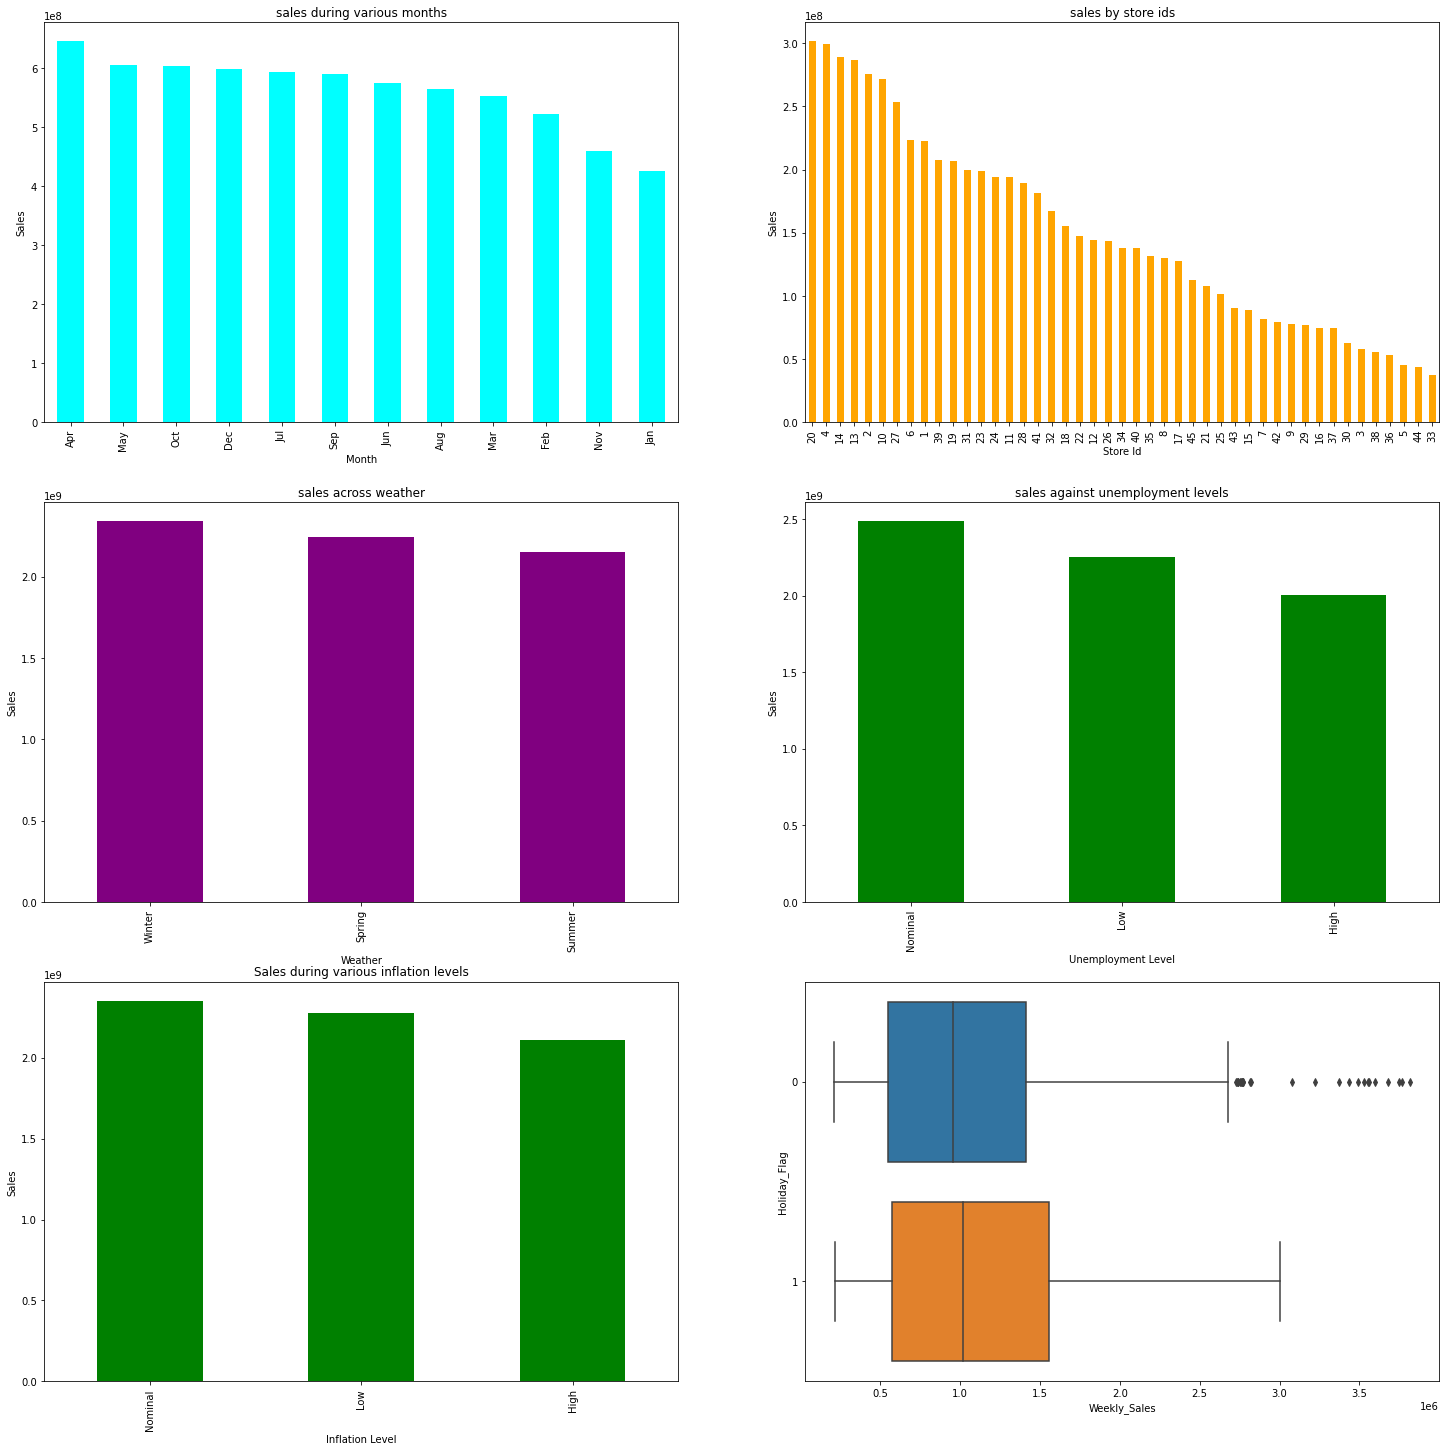

In [11]:
fig, axes = plt.subplots(figsize=(25,25),nrows=3, ncols=2)

rev=wmart.groupby(['month'])['Weekly_Sales'].sum().sort_values(ascending=False)
rev.plot(ax=axes[0,0],
           kind = 'bar',
           color='cyan',
         title = "sales during various months",
           sort_columns=False,
           xlabel = "Month",
           ylabel = "Sales"
           );

rev=wmart.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False)
rev.plot(ax=axes[0,1],
           kind = 'bar',
           color='orange',
           title = "sales by store ids",
           sort_columns=False,
           xlabel = "Store Id",
           ylabel = "Sales"
           );

rev=wmart.groupby(['Weather'])['Weekly_Sales'].sum().sort_values(ascending=False)
rev.plot(ax=axes[1,0],
           kind = 'bar',
           color='purple',
           title = "sales across weather",
           sort_columns=False,
           xlabel = "Weather",
           ylabel = "Sales"
           ) ;

rev=wmart.groupby(['Unemployment'])['Weekly_Sales'].sum().sort_values(ascending=False)
rev.plot(ax=axes[1,1],
           kind = 'bar',
           color='green',
           title = "sales against unemployment levels",
           sort_columns=False,
           xlabel = "Unemployment Level",
           ylabel = "Sales"
           ) ;

rev=wmart.groupby(['Inflation'])['Weekly_Sales'].sum().sort_values(ascending=False)
rev.plot(ax=axes[2,0],
           kind = 'bar',
           color='green',
           title = "Sales during various inflation levels",
           sort_columns=False,
           xlabel = "Inflation Level",
           ylabel = "Sales"
           ) ;
sns.boxplot(x='Weekly_Sales',y='Holiday_Flag',data=wmart,ax=axes[2,1])

*   April month has generated the most sales with Jan being the least<br>
*   Store number 20 generated the most sales during the period<br>
*   Store number 33 generated the least sales during the period<br>
*   Most Sales happened in winter<br>
*   Least sales happen in Summer<br>
*   Sales are least when unemployment is high<br>
*   Sales is least when inflation is high<br>
*   April month has generated the most sales with Jan being the least<br>
*   The minimum sales and maximum sales are higher on holidays



In [12]:
wmart.groupby(['Store','month'])['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

Weekly_Sales
Store month              
20    Apr     28998888.90
14    Apr     28601074.56
4     Apr     28448548.78
20    Oct     27456595.38
      Dec     27270096.85
...                   ...
33    Dec      2885510.43
      Feb      2834422.61
44    Nov      2754044.78
33    Jan      2441703.93
      Nov      2397699.15

[540 rows x 1 columns]

For many stores the highest sales happened in April

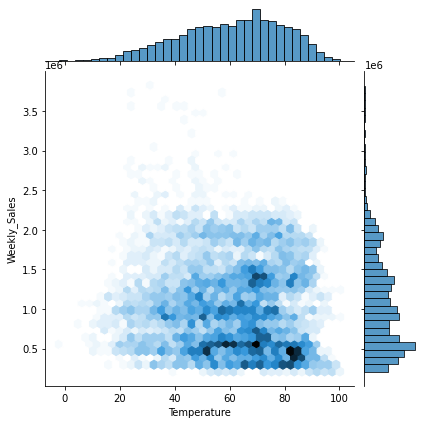

In [13]:
sns.jointplot(data=wmart,x='Temperature',y='Weekly_Sales',kind='hex')

The least Sales happened during high temperatures

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

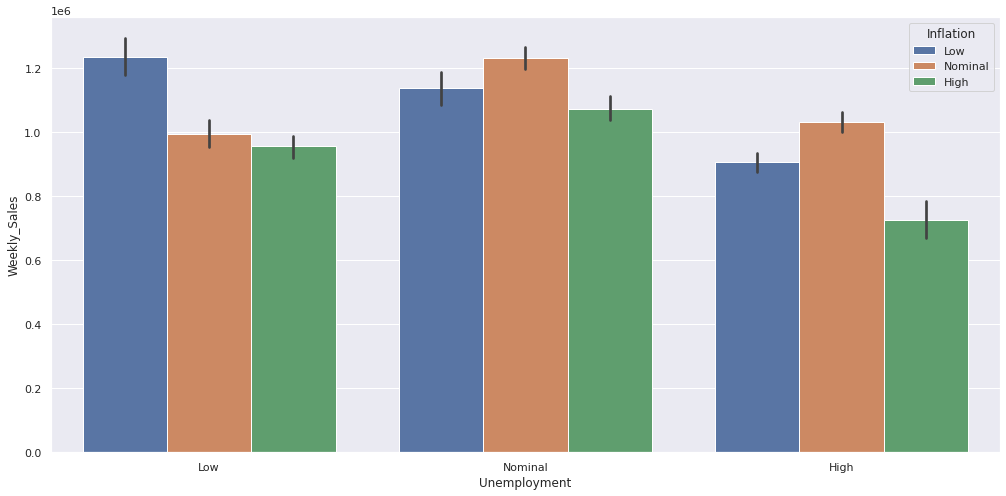

In [14]:
  sns.set(rc = {'figure.figsize':(17,8)})
sns.barplot(x = 'Unemployment',
            y = 'Weekly_Sales',
            estimator = np.mean ,     # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = wmart,               # Try np.mean also
            #capsize = 1,
            hue = 'Inflation'      # Age-cat wise plots
            )

Sales would be highest when both unemployment and inflation are low<br>
Sales woould be least when both unemployment and inflation are high<br>The best sales are achieved when both unemployment and inflation are nominal